<a href="https://colab.research.google.com/github/atharvapatil123/ML_Practice/blob/master/Clustering/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Theory

### **Clustering**: Automatic grouping of similar objects into sets.

A demo of K-Means clustering on the handwritten digits data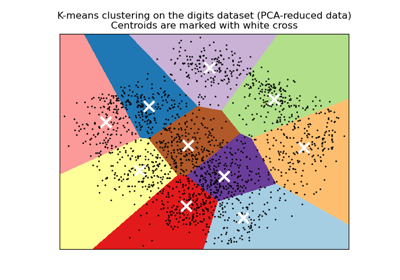

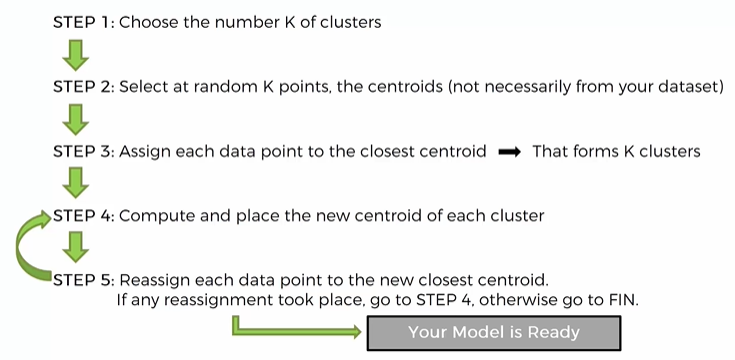

**Random Initialization Trap**

True Clustering: 

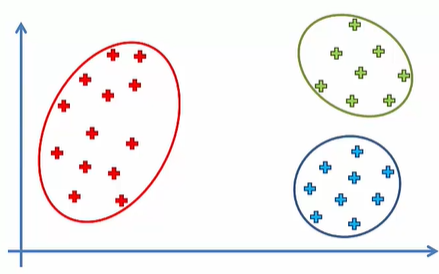

Random Initialization Image


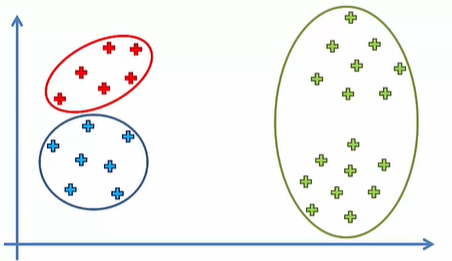

Solution => K-Means++

**Within-Cluster-Sum-of-Squares (WCSS)**

Sum of squares of distances of points from their respective centroids of clusters.

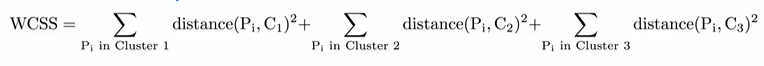

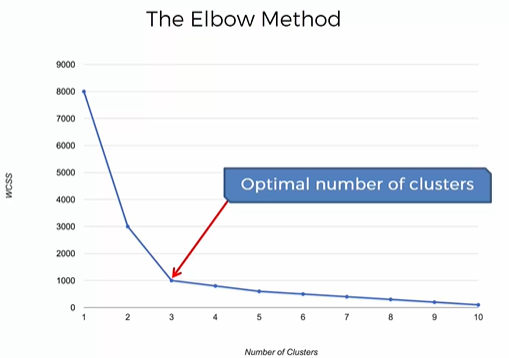

The value, where reduction in WCSS starts getting decreased by a small amount, is the optimal number of cluster

***Dependent variable is not available in clustering. All the features are used to recognize patterns, thus forming clusters***

## Implementation

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [ ]:
dataset = pd.read_csv("Mall_Customers.csv")
# JUST FOR VISUALIZATION WE ARE TAKING 2 FEATURES 
# SO THAT IS CAN BE SHOWN AS A 2-D GRAPH 
x = dataset.iloc[:, [3,4]].values
# Customer ID has no impact in recognizing patterns
x

### Using the elbow method to find the optimal number of clusters

[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006, 30259.65720728547, 25011.839349156588, 21850.165282585636, 19672.072849014323]


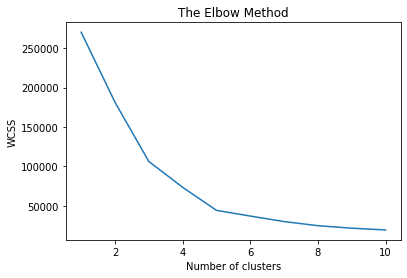

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) #42 aise hi :)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# 5 is optimal number of clusters

### Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
# fit_predict(): trains + Return dependent variable, 
# here 5 different values will be taken by this variable
# fit_predict(): Compute cluster centers and predict cluster index for each sample.
print(y_kmeans)
print(kmeans.cluster_centers_)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]
[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


### Visualising the clusters

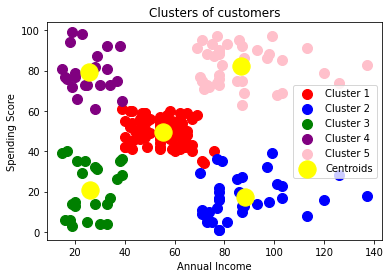

In [ ]:
# for i in range(0,len(x))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title("Clusters of customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()